In [1]:
import pandas as pd
file_name = 'd:\HR.csv'
with open(file_name) as f:
    reader = pd.read_csv(f)

In [2]:
import numpy as np
import scipy.stats as ss

In [4]:
norm_dist=ss.norm.rvs(size=20)
norm_dist

array([ 0.99897497,  1.5051592 ,  0.41204508, -0.63146705,  1.08529413,
        1.69666932,  1.25584682, -0.28753317,  0.5978059 ,  0.14232783,
        0.30914132, -0.30849639, -0.77560009,  0.95158868, -0.63469753,
        0.39808535, -1.21026847, -1.20157335,  0.69071912, -1.76530153])

In [6]:
ss.normaltest(norm_dist)#这是基于偏度和峰度的检验法

NormaltestResult(statistic=1.2118799833738343, pvalue=0.5455613623940709)

###### 卡方检验 ss

In [8]:
ss.chi2_contingency([[15,95],[85,5]])#第一个显示是检验统计量，第二个是P值小于0.05拒绝
#第三个是其自由度，最后的矩阵是如果符合要求应该的数值量理论分布

(126.08080808080808, 2.9521414005078985e-29, 1, array([[55., 55.],
        [45., 45.]]))

###### 独立分布t检验 ss

In [10]:
ss.ttest_ind(ss.norm.rvs(size=100),ss.norm.rvs(size=200))
#两组数据的独立性 大于0.05，接受，随着size增大，均值差别小越接近

Ttest_indResult(statistic=1.5182465511073595, pvalue=0.13001241460214807)

In [12]:
ss.f_oneway([49,50,39,40,43],[28,32,30,26,34],[38,40,45,42,48])#拒绝

F_onewayResult(statistic=17.619417475728156, pvalue=0.0002687153079821641)

In [15]:
from statsmodels.graphics.api import qqplot#画图api，内含原本的分布图，检验数据是否符合
from matplotlib import pyplot as plt

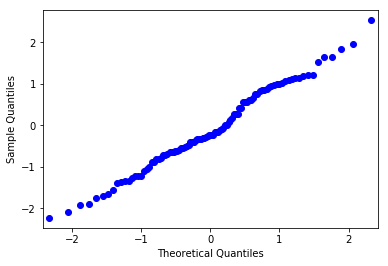

In [16]:
plt.show(qqplot(ss.norm.rvs(size=100)))
#在角平分线上就是基本符合分布规律

###### 计算相关系数 pandas

In [19]:
s1=pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])
s2=pd.Series([0.5,0.4,1.2,2.5,1.1,0.7,0.1])
s1.corr(s2,method='pearson')#可以指定方式,还有“spearman”

0.9333729600465923

In [25]:
reader=pd.DataFrame(np.array([s1,s2]).T)

In [26]:
reader.corr()

,0,1
0,1.000000,0.933373
1,0.933373,1.000000


In [31]:
x=np.arange(10).astype(np.float).reshape((10,1))#导入10个数字变成10个单独的矩阵数字

In [40]:
y=x*3+4+np.random.random((10,1))
y

array([[ 4.20704751],
       [ 7.17403   ],
       [10.96390568],
       [13.57639833],
       [16.5253481 ],
       [19.21529611],
       [22.83610941],
       [25.88775025],
       [28.47486832],
       [31.37163722]])

In [36]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [37]:
res=reg.fit(x,y)

In [38]:
y_pred=reg.predict(x)

In [39]:
y_pred

array([[ 4.29488784],
       [ 7.33992341],
       [10.38495898],
       [13.42999455],
       [16.47503012],
       [19.52006568],
       [22.56510125],
       [25.61013682],
       [28.65517239],
       [31.70020796]])

In [41]:
print(reg.coef_)#参数
print(reg.intercept_)#截距

[[3.04503557]]
[4.29488784]


###### PCA

In [49]:
data=np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T
#导入数据，用np.array，最后转置

In [50]:
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [51]:
from sklearn.decomposition import PCA
lower_dim=PCA(n_components=1)
lower_dim.fit(data)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
lower_dim.explained_variance_ratio_#降低维度后剩下的保真量

array([0.96318131])

In [53]:
lower_dim.fit_transform(data)#转化后的数值，这里其实是奇异值的分解算法

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

###### PCA自写

In [57]:
def myPCA(data,n_components=100000):
    mean_vals = np.mean(data,axis=0)#对列求
    mid = data-mean_vals
    cov_mat = np.cov(mid,rowvar=False)#只对列进行协方差计算
    from scipy import linalg
    #用于数学线性计算使用，逆矩阵、求特征值、解线性方程组以及求解行列式等
    eig_vals,eig_vects = linalg.eig(np.mat(cov_mat))#mat创建矩阵
    eig_val_index=np.argsort(eig_vals)#求出排序的索引下标
    eig_val_index=eig_val_index[:-(n_components+1):-1]
    eig_vects = eig_vects[:,eig_val_index]
    low_dim_mat = np.dot(mid,eig_vects)
    return low_dim_mat,eig_vals

In [58]:
print(myPCA(data,n_components=1))

(array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]]), array([0.0490834 +0.j, 1.28402771+0.j]))
